# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 


CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000's

## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv("/Users/m.soren/Desktop/Ironhack/Labs/lab-problems-with-ML/data/boston_data.csv")


In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [5]:
boston["zn"].value_counts()
# So this could be a coulumn we have to take a closer look at. 300/404 vlaues are 0.

0.0     300
20.0     15
12.5     10
80.0     10
22.0      9
25.0      8
30.0      6
40.0      5
45.0      4
60.0      4
52.5      3
21.0      3
75.0      3
34.0      3
33.0      3
95.0      3
28.0      2
85.0      2
82.5      2
90.0      2
70.0      2
55.0      2
35.0      1
17.5      1
18.0      1
Name: zn, dtype: int64

In [7]:
boston["chas"].value_counts() 
#Another column that should be look at. Almost all values are 0.

0.0    376
1.0     28
Name: chas, dtype: int64

In [8]:
boston_edited = boston.drop("chas", axis=1)

In [10]:
from scipy import stats

z = np.abs(stats.zscore(boston_edited))
z.shape

(404, 13)

In [13]:
boston_edited_z3 = boston_edited[(z>3).any(axis=1)]


In [14]:
len(boston_edited_z3.columns)

13

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

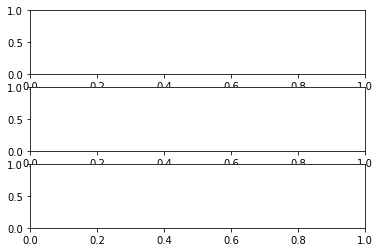

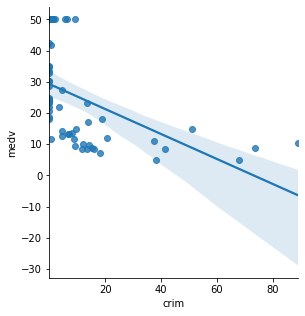

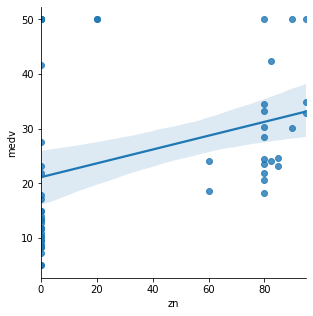

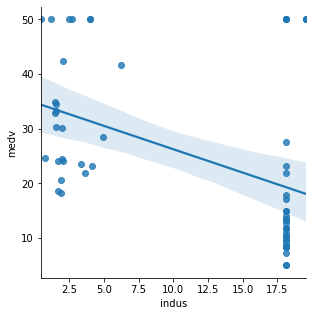

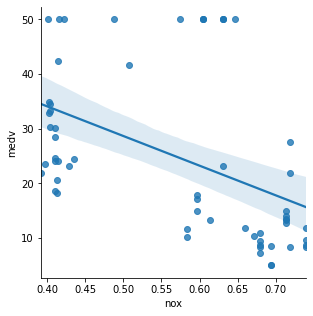

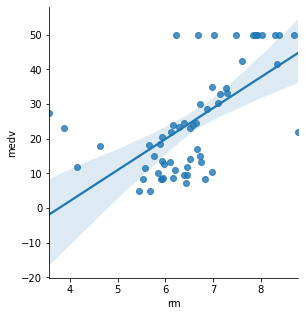

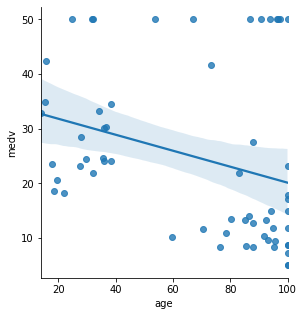

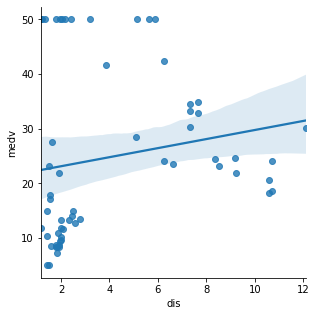

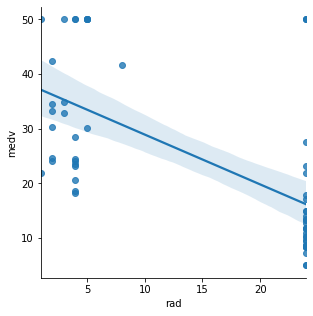

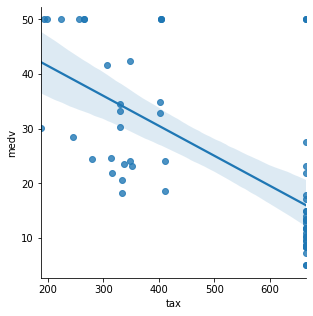

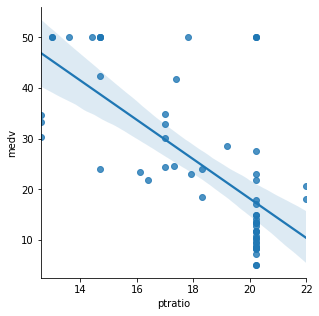

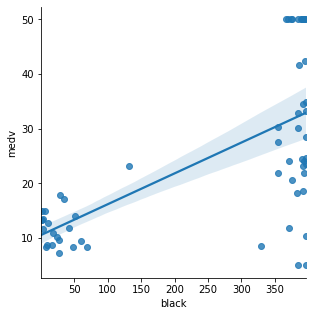

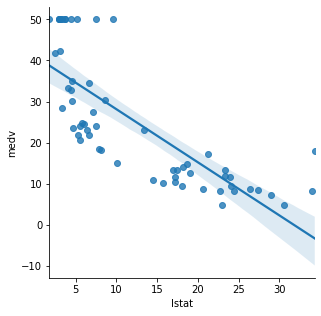

In [17]:
fig, ax = plt.subplots(3)

for i in range(len(boston_edited_z3.drop("medv", axis=1).columns)):
    g = sns.pairplot(boston_edited_z3,x_vars=list(boston_edited_z3.drop("medv", axis=1).columns)[i], y_vars="medv", kind="reg")
    g.fig.set_size_inches(5,5)

    #I do not like that there is no easy way for seaborn pairplor to be displayed nextg to each other.


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

## It is unexpected that the air quality has such a big impact on the price. Also unexpected is that the distance to a job center has such a influence.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

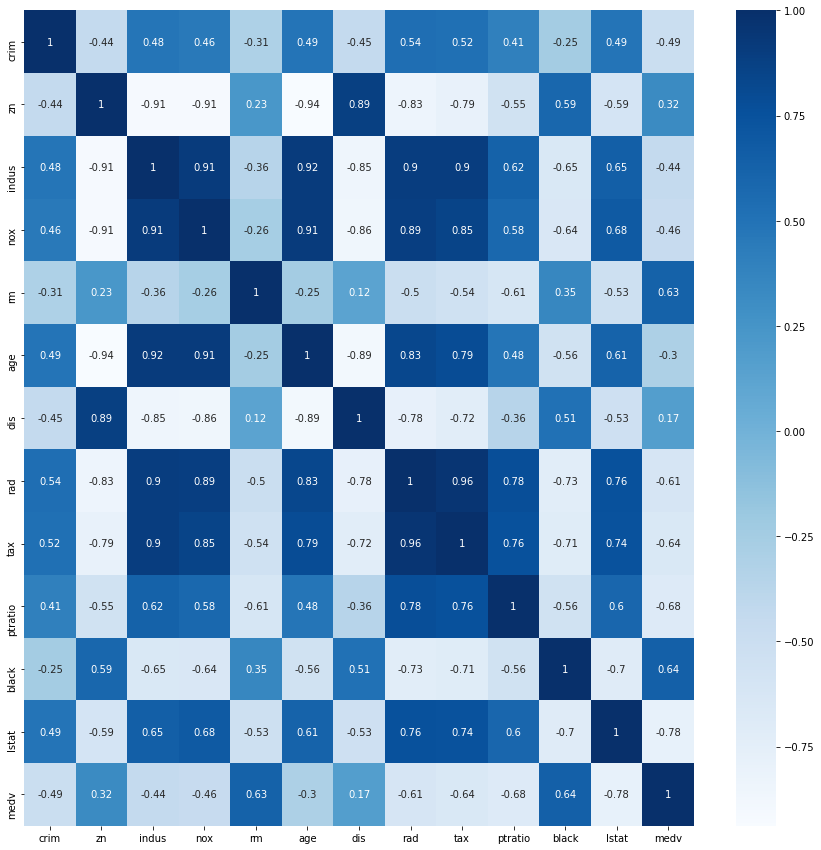

In [20]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(boston_edited_z3.corr(), annot=True, cmap="Blues")

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [21]:
boston_edited_z3["medv"].describe()


count    60.000000
mean     24.846667
std      15.388290
min       5.000000
25%      11.775000
50%      21.900000
75%      34.675000
max      50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [24]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ 
    Calculates and returns the performance score between 
    true and predicted values based on the metric chosen. """
    # Your code here:
    R2 = r2_score(y_true, y_predict)
    pd.options.display.float_format = '{:.2f}'.format
    df = pd.DataFrame({'Error_metric': ['R2'],
                            'Train': [R2]})
    return df

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [27]:
# Your code here
from sklearn.model_selection import train_test_split

X = boston_edited_z3.drop("medv", axis=1)
y = boston_edited_z3["medv"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
def model_performance_metric(y_train, y_pred_train, y_test, y_pred_test):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['R2'],
                            'Train': [R2_train],
                            'Test' : [R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'PRedicted_value': y_pred_test})

    return performance, df_train, df_test

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [30]:

from sklearn.ensemble import RandomForestRegressor

max_depth_list = [2,4,6,8,10]
full = pd.DataFrame()

rfr_models = {'i': []}

for i in max_depth_list:
    rfr = RandomForestRegressor(max_depth = i)
    rfr.fit(X_train, y_train)

    rfr_models['i'] = [i, rfr]
    
    y_pred_train = rfr.predict(X_train)
    y_pred_test= rfr.predict(X_test)

    performance_rfr, _, _ = model_performance_metric(y_train, y_pred_train, y_test, y_pred_test)
    temp = pd.DataFrame({'i': [i], 
                         'Train': performance_rfr['Train'], 'Test': performance_rfr['Test']})
    full = pd.concat([full,temp], axis=0)

full


,i,Train,Test
0,2,0.89,0.75
0,4,0.96,0.72
0,6,0.96,0.73
0,8,0.97,0.74
0,10,0.97,0.66


Now, plot the score for each tree on the training set and on the testing set.

In [31]:
full2 = full.melt(id_vars=['i'])
full2

,i,variable,value
0,2,Train,0.89
1,4,Train,0.96
2,6,Train,0.96
3,8,Train,0.97
4,10,Train,0.97
5,2,Test,0.75
6,4,Test,0.72
7,6,Test,0.73
8,8,Test,0.74
9,10,Test,0.66


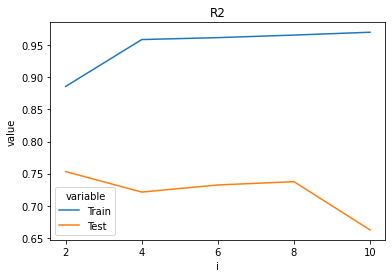

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


g=sns.lineplot(x = 'i', y = 'value', data = full2, hue = 'variable')
g.set_xticks(max_depth_list) 
g.set_title("R2");

What do these results tell you about the effect of the depth of the trees on the performance of the model?

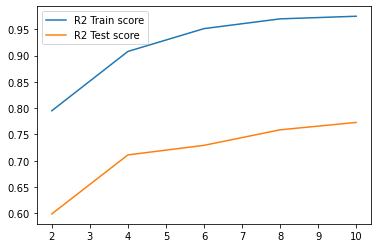

In [79]:
# Produce a plot with the score for the testing and training for the different max depths


In [ ]:
# Your response here


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [33]:
rfr_1 = RandomForestRegressor(max_depth = 1)
rfr_10 = RandomForestRegressor(max_depth = 10)
rfr_1.fit(X_train, y_train)
rfr_10.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [34]:
y_pred_train_1 = rfr_1.predict(X_train)
y_pred_test_1 = rfr_1.predict(X_test)
y_pred_train_10  = rfr_10.predict(X_train)
y_pred_test_10 = rfr_10.predict(X_test)


In [35]:
np.var(y_pred_train_1),np.var(y_pred_test_1),np.var(y_pred_train_10),np.var(y_pred_test_10)

(104.69073421933433, 104.80457279019953, 189.92269930555565, 214.2739847430556)

In [37]:
bias_1 = (y_test - np.mean(y_pred_test_1))**2
bias_1

14    206.41
36    725.38
234    19.65
303   347.19
89      0.00
355   181.36
223    93.45
314   725.38
88    725.38
400    65.08
304   218.07
333    66.70
Name: medv, dtype: float64

In [38]:
bias_10 = (y_test - np.mean(y_pred_test_10))**2
bias_10

14    288.88
36    590.66
234     3.25
303   256.11
89      6.74
355   259.10
223   151.21
314   590.66
88    590.66
400   114.42
304   302.64
333   116.57
Name: medv, dtype: float64

In [39]:
bias_df = pd.DataFrame({"max_dept_1":bias_1,"max_dept_10":bias_10})
bias_df= bias_df.reset_index().rename(columns ={ "index":"observation"})
bias_df

,observation,max_dept_1,max_dept_10
0,14,206.41,288.88
1,36,725.38,590.66
2,234,19.65,3.25
3,303,347.19,256.11
4,89,0.00,6.74
5,355,181.36,259.10
6,223,93.45,151.21
7,314,725.38,590.66
8,88,725.38,590.66
9,400,65.08,114.42


In [40]:
bias_df_2= bias_df.melt(id_vars=['observation'])
bias_df_2

,observation,variable,value
0,14,max_dept_1,206.41
1,36,max_dept_1,725.38
2,234,max_dept_1,19.65
3,303,max_dept_1,347.19
4,89,max_dept_1,0.00
5,355,max_dept_1,181.36
6,223,max_dept_1,93.45
7,314,max_dept_1,725.38
8,88,max_dept_1,725.38
9,400,max_dept_1,65.08


In [41]:
bias_df_2[bias_df_2["variable"] == "max_dept_1"]["value"].mean()

281.17141589544997

In [42]:
avg_bias_1= bias_df_2[bias_df_2["variable"] == "max_dept_1"]["value"].mean()
avg_bias_10=bias_df_2[bias_df_2["variable"] == "max_dept_10"]["value"].mean()
avg_bias_1, avg_bias_10

(281.17141589544997, 272.5738422291667)

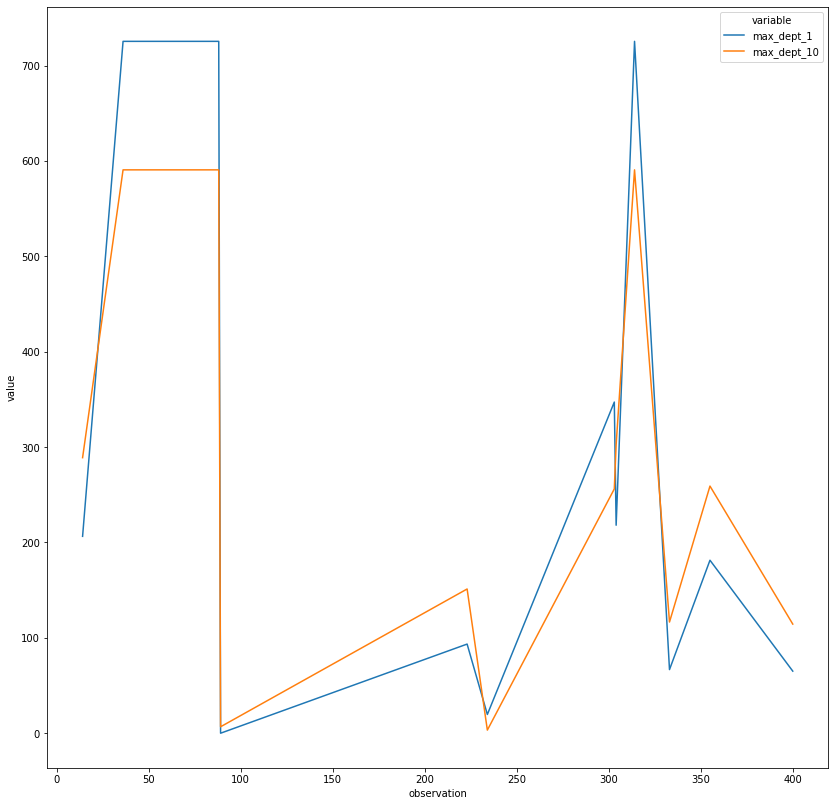

In [43]:
fig, ax = plt.subplots(figsize=(14,14))
sns.lineplot(x='observation', y = 'value', data=bias_df_2, hue='variable');

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
